# Bangladeshi Extinction Prediction

### Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
import os
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller, kpss
from sklearn.linear_model import LogisticRegression
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

warnings.filterwarnings("ignore")
period=(int(input("How many years do you wanna predict: ")))*365

### Functions

In [2]:
def stationarity_test(timeseries, name):
    dftest = adfuller(timeseries, autolag='AIC')
    kpss_test = kpss(timeseries, regression='c')
    
    adf_stationary = dftest[1] < 0.05
    kpss_stationary = kpss_test[1] > 0.05

    if adf_stationary and kpss_stationary:
        print(f"The series {name} is stationary.")
    else:
        print(f"The series {name} is not stationary.")

In [3]:
def arima_grid_search(timeseries, p_max=2, q_max=2, d=0):
    results = []

    for p in tqdm(range(p_max), desc="p"):
        for q in tqdm(range(q_max), desc="q", leave=False):
            try:
                model = ARIMA(timeseries, order=(p, d, q))
                model_fit = model.fit()
                results.append((p, q, model_fit.aic, model_fit.bic))
            except Exception as e:
                print(f"ARIMA({p},{d},{q}) failed: {e}")

    results_df = pd.DataFrame(results, columns=['p', 'q', 'aic', 'bic'])
    display(results_df.sort_values('aic').head())
    return results_df

In [4]:
def plot_forecast(original_series, forecast_values, period, title='ARIMA Forecast'):
    forecast_df = pd.DataFrame({
        'Forecast': forecast_values + original_series.iloc[-period:].values,
        'Original': original_series.iloc[-period:].values
    }, index=pd.date_range(original_series.index[-1], periods=period + 1, freq='D')[1:])
    
    plt.figure(figsize=(10, 6))
    plt.plot(original_series.index, original_series, label='Original Series', color='blue')
    plt.plot(forecast_df.index, forecast_df['Forecast'], label='ARIMA Forecast', color='red')

    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()
    return forecast_df['Forecast'].values

### Scrape the net for the data

In [5]:
# import logging
# import pandas as pd
# from tqdm.notebook import tqdm
# from selenium import webdriver
# from selenium.webdriver.common.by import By
# from selenium.webdriver.support.ui import WebDriverWait
# from selenium.webdriver.support import expected_conditions as ec
# from selenium.webdriver.common.action_chains import ActionChains

# logging.basicConfig(level=logging.INFO,
#                     format='%(asctime)s - %(levelname)s - %(message)s')

In [6]:
# options = webdriver.ChromeOptions()
# options.add_argument('--start-maximized')
# # options.add_argument('--headless')
# driver = webdriver.Chrome(options=options)

In [7]:
# driver.get('https://global-flood-database.cloudtostreet.ai/#interactive-map')

In [8]:
# input_country = WebDriverWait(driver, 10).until(
#     ec.presence_of_element_located((By.XPATH, '//*[@id="country-selection"]')))

# # clear the input field
# input_country.clear()
# # type country name 
# input_country.send_keys('India')
# # press enter
# input_country.send_keys(u'\ue007')

In [9]:
# for i in range(146):
#     try:
#         logging.info(f'Flood number {i}')
#         select_flood = WebDriverWait(driver, 10).until(
#             ec.presence_of_element_located((By.XPATH, '//*[@class="MuiFormControl-root"]')))
#         select_flood.click()
#         logging.info('Selecting flood')

#         all_floods = WebDriverWait(driver, 10).until(       
#             ec.presence_of_all_elements_located((By.CSS_SELECTOR, 'li[class="MuiButtonBase-root MuiListItem-root MuiMenuItem-root MuiMenuItem-gutters MuiListItem-gutters MuiListItem-button"]')))[1:]
#         logging.info('All floods found')
        
#         WebDriverWait(driver, 10).until(
#             ec.element_to_be_clickable(all_floods[i])
#         )
#         ActionChains(driver).move_to_element(all_floods[i]).perform()
#         logging.info('Hovered on flood')

#         all_floods[i].click()
#         logging.info('Clicked on flood')
        
#         download_button = WebDriverWait(driver, 10).until(
#             ec.presence_of_element_located((By.CSS_SELECTOR, 'a[class="makeStyles-downloadBtn-84"]')))
#         WebDriverWait(driver, 10).until(
#             ec.element_to_be_clickable(download_button)
#         )
#         download_button.click()
#     except Exception as e:
#         logging.error(e)
#         raise e

In [10]:
# floods_table = WebDriverWait(driver, 10).until(
#             ec.presence_of_element_located((By.CSS_SELECTOR, 'div[class="MuiDataGrid-root MuiDataGrid-root floods-data-grid MuiDataGrid-autoHeight"]')))
# columns = floods_table.text.split('\n')[:6]

In [11]:
# flood_date =[]
# exposed = []
# displaced = []
# killed = []
# duration = []
# cause = []

# while True:
#     try:
#         floods_table = WebDriverWait(driver, 10).until(
#             ec.presence_of_element_located((By.CSS_SELECTOR, 'div[class="MuiDataGrid-root MuiDataGrid-root floods-data-grid MuiDataGrid-autoHeight"]')))
#         logging.info('Scrolling')
#         ActionChains(driver).move_to_element(floods_table).perform()
#         logging.info('Scrolled')

#         for i in range(6, len(floods_table.text.split('\n')), 6):
#             if i + 5 < len(floods_table.text.split('\n')):
#                 flood_date.append(floods_table.text.split('\n')[i])
#                 exposed.append(floods_table.text.split('\n')[i+1])
#                 displaced.append(floods_table.text.split('\n')[i+2])
#                 killed.append(floods_table.text.split('\n')[i+3])
#                 duration.append(floods_table.text.split('\n')[i+4])
#                 cause.append(floods_table.text.split('\n')[i+5])

#         next_button = WebDriverWait(driver, 10).until(
#             ec.presence_of_element_located((By.CSS_SELECTOR, 'button[title="Next page"]')))
#         next_button.click()
#         logging.info('Clicked next button')
#     except Exception as e:
#         logging.error(e)
#         break

In [12]:
# df = pd.DataFrame({
#     columns[0]: flood_date,
#     columns[1]: exposed,
#     columns[2]: displaced,
#     columns[3]: killed,
#     columns[4]: duration,
#     columns[5]: cause
# })

# df['exposed (mn)'] = df['exposed (mn)'].str.replace(',', '').astype(int)
# df['displaced (k)'] = df['displaced (k)'].str.replace(',', '').astype(int)
# df['killed'] = df['killed'].str.replace(',', '').astype(int)
# df['duration(days)'] = df['duration(days)'].astype(int)
# df['flood'] = pd.to_datetime(df['flood'])

# df.set_index('flood', inplace=True)
# df.sort_index(inplace=True)

# df.to_csv('floods.csv')

# df.head()

### Preprocessing

All the above bs that you simply scrolled thru gave the data<br>You get floods.csv by scraping and open-meteo-blah-blah by API call

In [ ]:
df_floods=pd.read_csv(r'Datasets/floods.csv',parse_dates=True,index_col='flood')
df_floods['Flood']=np.ones(len(df_floods)).astype(int)
df_floods.head()

,exposed (mn),displaced (k),killed,duration(days),cause,Flood
flood,,,,,,
2000-09-18,7481712,24000000,1468,33,Heavy rain,1
2001-07-08,208434,2000000,100,33,Heavy rain,1
2001-08-20,1701849,300000,65,22,Heavy rain,1
2001-09-07,250633,30000,146,17,Heavy rain,1
2002-06-21,7191176,15000000,503,68,Heavy rain,1


array([<Axes: xlabel='flood'>, <Axes: xlabel='flood'>,
       <Axes: xlabel='flood'>, <Axes: xlabel='flood'>,
       <Axes: xlabel='flood'>], dtype=object)

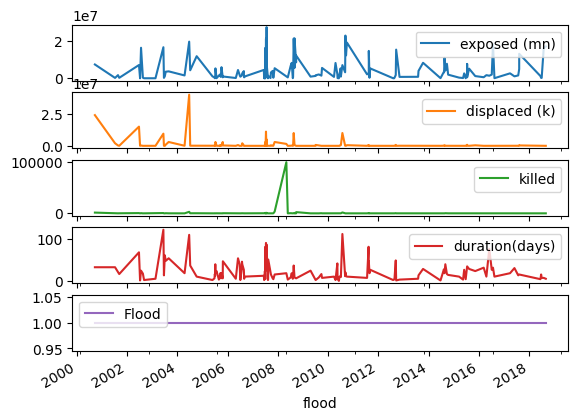

In [14]:
df_floods.plot(subplots=True)

In [15]:
date_range = pd.date_range(start='2000-09-01', end='2018-09-30', freq='D')
final_df = pd.DataFrame(index=date_range)

final_df['Flood'] = 0
final_df['Killed'] = np.nan
final_df['Exposed'] = np.nan  
final_df['Duration'] = np.nan  

for i, row in df_floods.iterrows():
    start_date = i  
    end_date = start_date + pd.Timedelta(days=row['duration(days)'] - 1)
    
    final_df.loc[start_date:end_date, 'Flood'] = 1
    final_df.loc[start_date:end_date, 'Killed'] = row['killed']
    final_df.loc[start_date:end_date, 'exposed (mn)'] = row['exposed (mn)']  
    final_df.loc[start_date:end_date, 'Duration(days)'] = row['duration(days)']  

final_df['Killed'].fillna(0, inplace=True)
final_df.drop(columns=['Duration','Exposed'],inplace=True)
final_df.head()

,Flood,Killed,exposed (mn),Duration(days)
2000-09-01,0,0.0,NaN,NaN
2000-09-02,0,0.0,NaN,NaN
2000-09-03,0,0.0,NaN,NaN
2000-09-04,0,0.0,NaN,NaN
2000-09-05,0,0.0,NaN,NaN


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

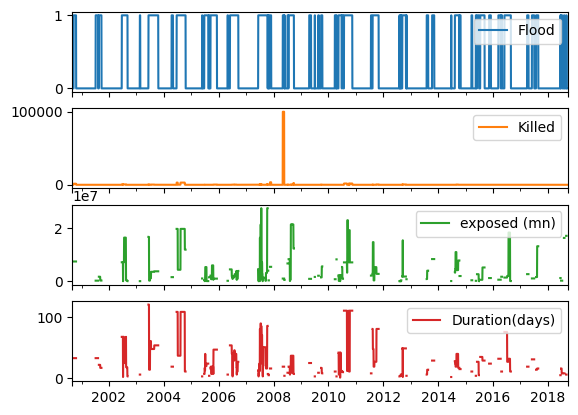

In [16]:
final_df.plot(subplots=True)

In [17]:
df_rain=pd.read_csv(r'Datasets/open-meteo-24.01N90.00E11m.csv')
df_rain['time'] = pd.to_datetime(df_rain['time'])
df_rain['date'] = df_rain['time'].dt.date
df_rain = df_rain.groupby('date')['rain (mm)'].sum().reset_index()
df_rain.set_index(df_rain['date'],inplace=True)
df_rain.drop(columns=['date'],inplace=True)
df_rain.head()

,rain (mm)
date,
2000-09-01,16.8
2000-09-02,8.7
2000-09-03,11.9
2000-09-04,7.9
2000-09-05,4.1


In [18]:
merged_df = pd.merge(final_df, df_rain, left_index=True, right_index=True, how='left')
merged_df['rain (mm)'].fillna(0, inplace=True)
merged_df.rename(columns={
    'rain (mm)': 'Rain', 
    'killed':'Killed',
    'exposed (mn)':'Exposed',
    'Duration(days)':'Duration'}, inplace=True)

merged_df['KilledPerDay'] = np.where(merged_df['Flood'] > 0, np.nan, 0)
merged_df['ExposedPerDay'] = np.where(merged_df['Flood'] > 0, np.nan, 0)
merged_df.head()
merged_df.head()

,Flood,Killed,Exposed,Duration,Rain,KilledPerDay,ExposedPerDay
2000-09-01,0,0.0,NaN,NaN,16.8,0.0,0.0
2000-09-02,0,0.0,NaN,NaN,8.7,0.0,0.0
2000-09-03,0,0.0,NaN,NaN,11.9,0.0,0.0
2000-09-04,0,0.0,NaN,NaN,7.9,0.0,0.0
2000-09-05,0,0.0,NaN,NaN,4.1,0.0,0.0


In [19]:
for i in tqdm(range(len(df_floods.index))):
    start_date = df_floods.index[i]
    end_date = (start_date+pd.Timedelta(days=df_floods['duration(days)'][i]-1)).date()

    flood_range = pd.date_range(start_date,end_date,freq='D')

    sum_rain = merged_df.loc[flood_range]['Rain'].sum()

    killed = df_floods['killed'][i]
    exposed = df_floods['exposed (mn)'][i]

    rain = merged_df.loc[flood_range]['Rain'].values



    merged_df.loc[flood_range,'KilledPerDay']=(killed/sum_rain)*rain
    merged_df.loc[flood_range,'ExposedPerDay']=(exposed/sum_rain)*rain
    
merged_df.drop(columns=['Exposed', 'Duration','Killed'],inplace=True)

100%|██████████| 147/147 [00:00<00:00, 715.84it/s]


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

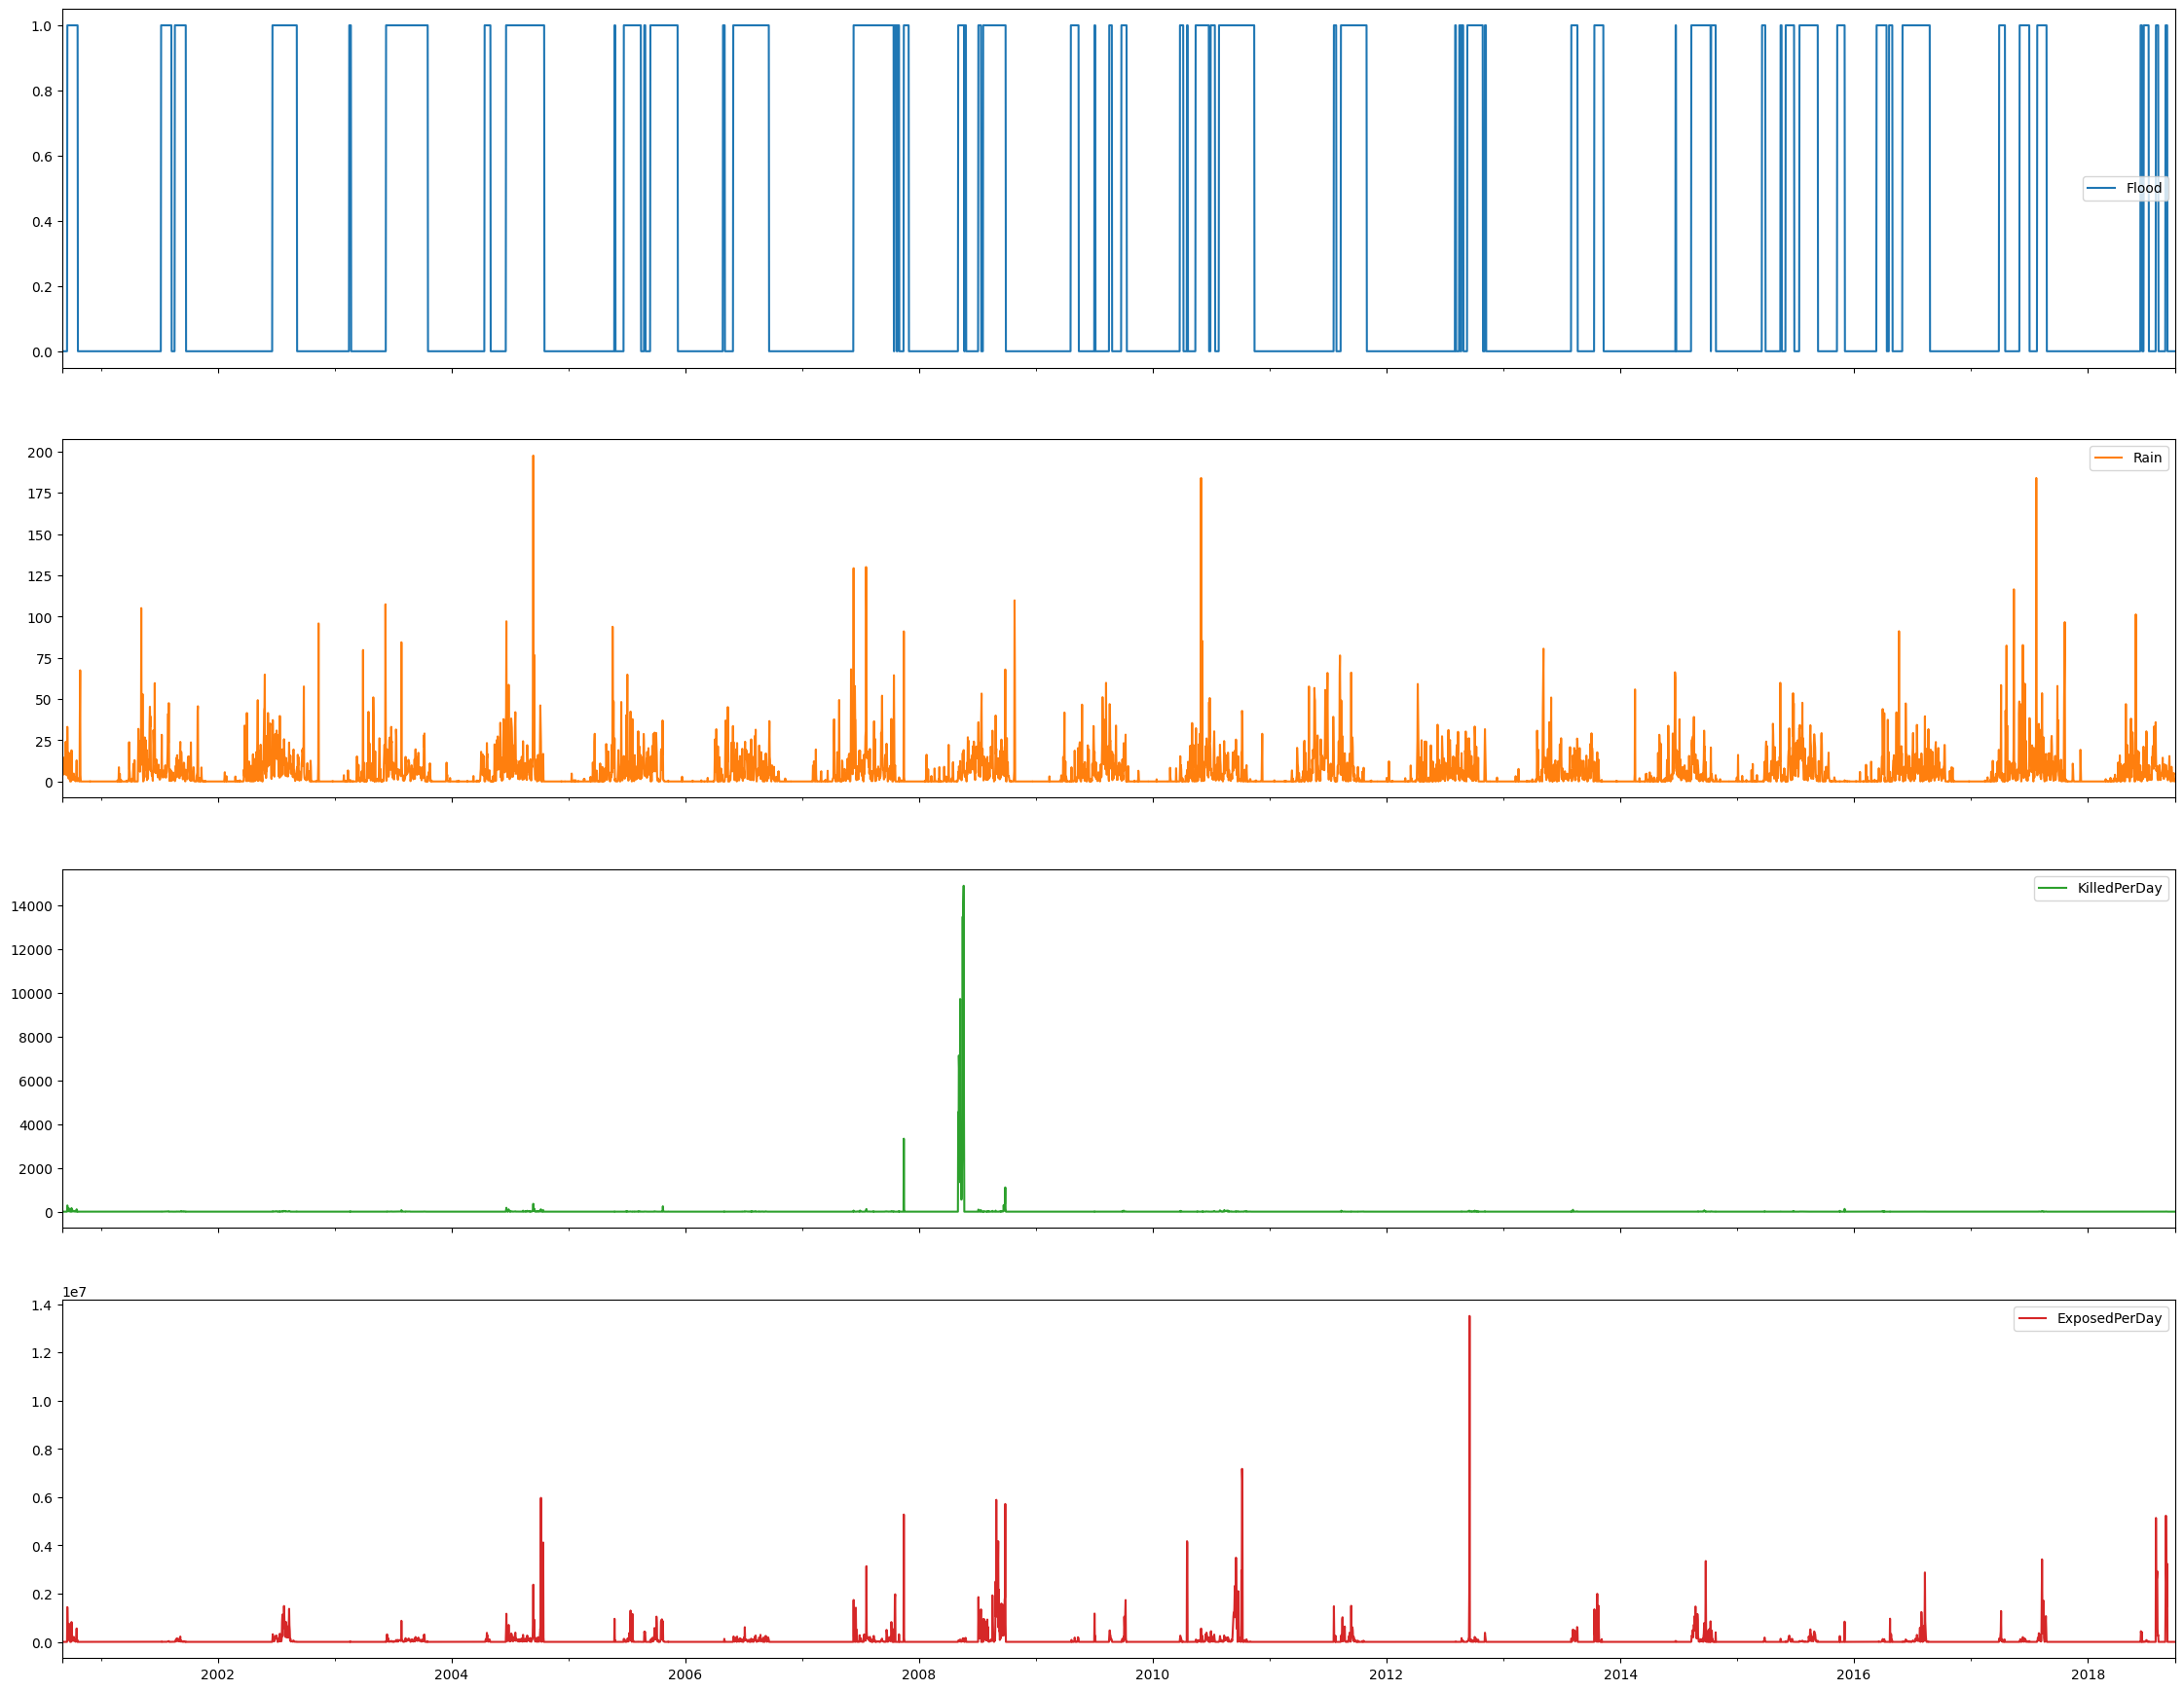

In [20]:
# merged_df.to_csv(r'Main.csv')
merged_df.plot(subplots=True, figsize=(28,22))

In [21]:
sc = StandardScaler()
scaled_df = merged_df.copy()
scaled_df[['Rain', 'KilledPerDay', 'ExposedPerDay']] = sc.fit_transform(scaled_df[['Rain', 'KilledPerDay', 'ExposedPerDay']])
scaled_df.tail()

,Flood,Rain,KilledPerDay,ExposedPerDay
2018-09-26,0,-0.076587,-0.047737,-0.171694
2018-09-27,0,-0.031995,-0.047737,-0.171694
2018-09-28,0,-0.468994,-0.047737,-0.171694
2018-09-29,0,-0.361974,-0.047737,-0.171694
2018-09-30,0,-0.468994,-0.047737,-0.171694


<Axes: >

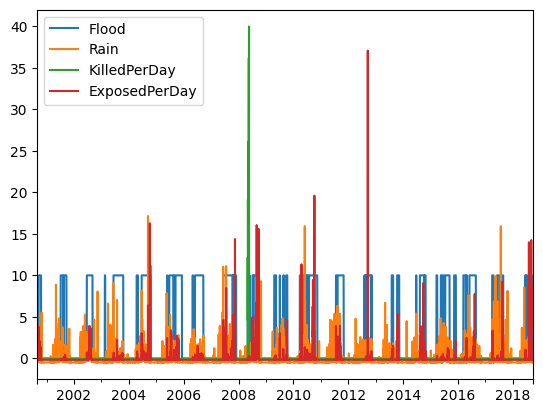

In [22]:
scaled_df['Flood']=scaled_df['Flood']*10
scaled_df.plot()

In [23]:
directory = r"C:\Users\garvb\Downloads\Imp docs\Year-3\Sem-5\Time Series\ATSA - Codes\Project\Datasets"
file_path = os.path.join(directory, 'Main.csv')
scaled_df['Flood']=scaled_df['Flood']/10
scaled_df.to_csv(file_path)

### Visualising the processed data

In [24]:
df = pd.read_csv(r'Datasets/Main.csv', parse_dates=True, index_col='Unnamed: 0')
df.index = pd.to_datetime(df.index, format='%d-%m-%Y')
df.head()

,Flood,Rain,KilledPerDay,ExposedPerDay
2000-09-01,0.0,1.011453,-0.047737,-0.171694
2000-09-02,0.0,0.289066,-0.047737,-0.171694
2000-09-03,0.0,0.574454,-0.047737,-0.171694
2000-09-04,0.0,0.217719,-0.047737,-0.171694
2000-09-05,0.0,-0.121178,-0.047737,-0.171694


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

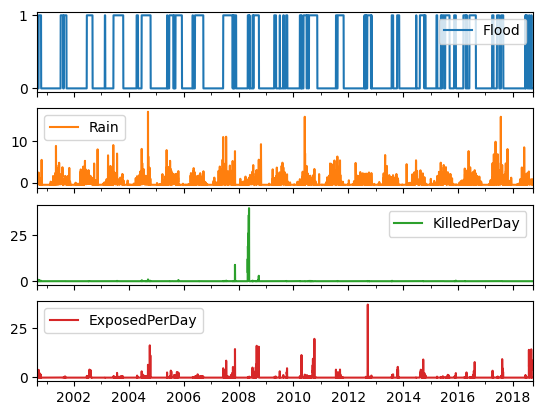

In [25]:
df.plot(subplots=True)

### Running tests on the data

In [26]:
df['rain_diff'] = df['Rain'] - df['Rain'].shift(1)
df['dead_diff'] = df['KilledPerDay'] - df['KilledPerDay'].shift(1)
df['exp_diff'] = df['ExposedPerDay'] - df['ExposedPerDay'].shift(1)
df.dropna(inplace=True)

In [27]:
stationarity_test(df['rain_diff'],'rain')
stationarity_test(df['dead_diff'],'dead')
stationarity_test(df['exp_diff'],'exposed')

The series rain is stationary.
The series dead is stationary.
The series exposed is stationary.


### Function Plots

#### Rain Plots

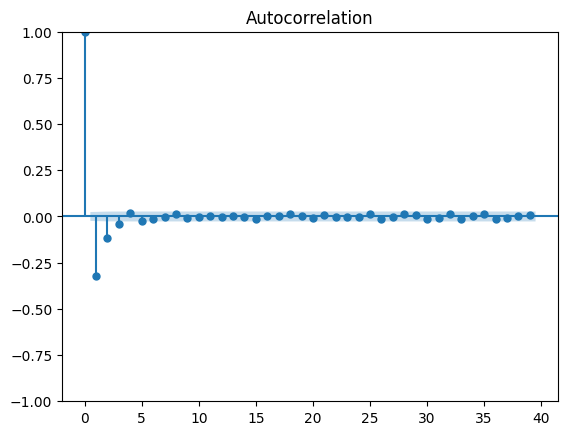

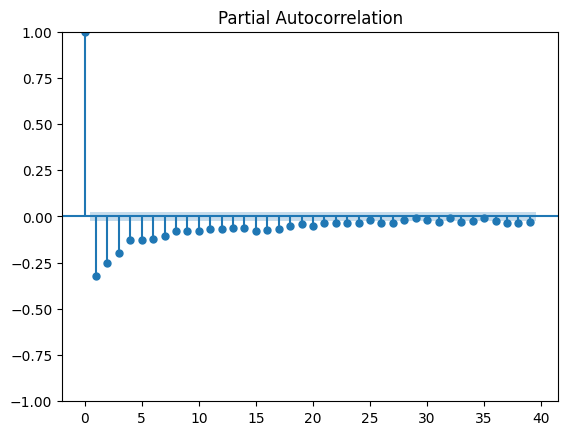

In [28]:
acf = plot_acf(df['rain_diff'])
pacf = plot_pacf(df['rain_diff'])

#### Death Plots

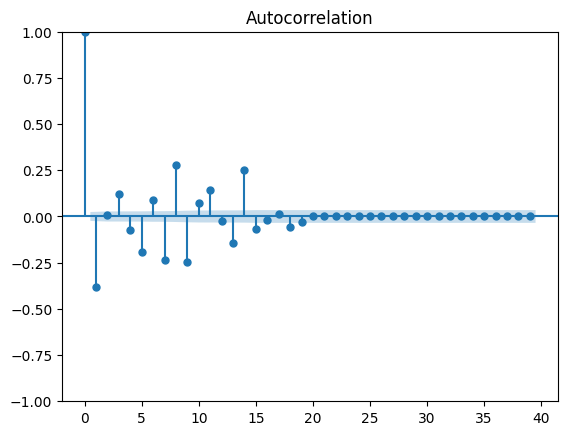

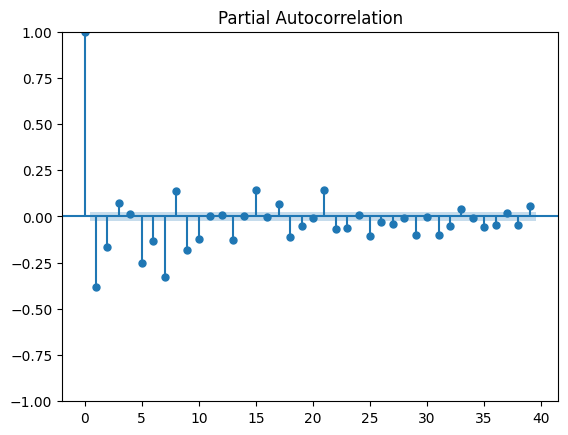

In [29]:
acf = plot_acf(df['dead_diff'])
pacf = plot_pacf(df['dead_diff'])

#### Exposed Plots

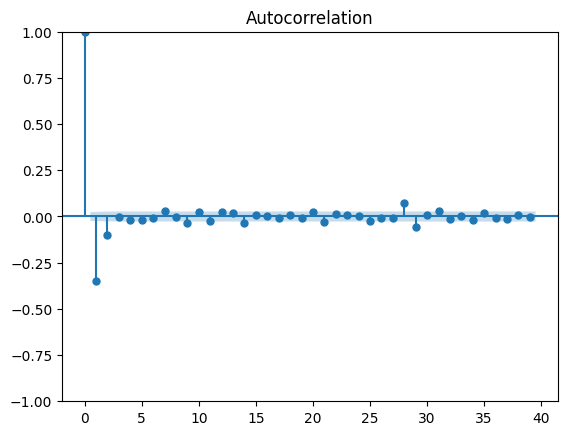

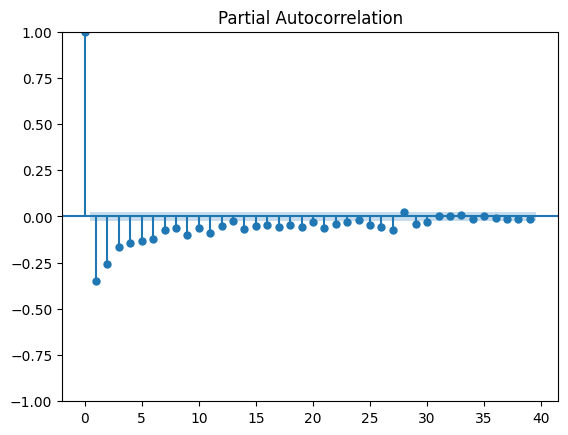

In [30]:
acf = plot_acf(df['exp_diff'])
pacf = plot_pacf(df['exp_diff'])

### Building a forecasting model

In [31]:
date_range = pd.date_range(start=start_date, periods=period, freq='D')
forecast_df = pd.DataFrame(index=date_range)

Rain_Arima_Search = arima_grid_search(df['rain_diff'].dropna(),d=0)
Dead_Arima_Search = arima_grid_search(df['dead_diff'].dropna(),d=0)
Exposed_Arima_Search = arima_grid_search(df['exp_diff'].dropna(),d=0)

p: 100%|██████████| 2/2 [00:02<00:00,  1.29s/it]


,p,q,aic,bic
3,1,1,16807.969133,16835.150250
1,0,1,17482.015610,17502.401448
2,1,0,18333.391746,18353.777584
0,0,0,19066.588634,19080.179193


p: 100%|██████████| 2/2 [00:01<00:00,  1.13it/s]


,p,q,aic,bic
3,1,1,15170.244536,15197.425654
1,0,1,15173.960408,15194.346246
2,1,0,15298.469121,15318.854959
0,0,0,16350.430787,16364.021346


p: 100%|██████████| 2/2 [00:01<00:00,  1.01it/s]


,p,q,aic,bic
3,1,1,17225.792491,17252.973608
1,0,1,17743.237954,17763.623792
2,1,0,18603.058534,18623.444372
0,0,0,19466.093454,19479.684013


In [32]:
p_rain = Rain_Arima_Search.iloc[0,0]      #7
q_rain = Rain_Arima_Search.iloc[0,1]      #4
p_dead = Dead_Arima_Search.iloc[0,0]      #9
q_dead = Dead_Arima_Search.iloc[0,1]      #9
p_exp = Exposed_Arima_Search.iloc[0,0]    #6
q_exp = Exposed_Arima_Search.iloc[0,1]    #8

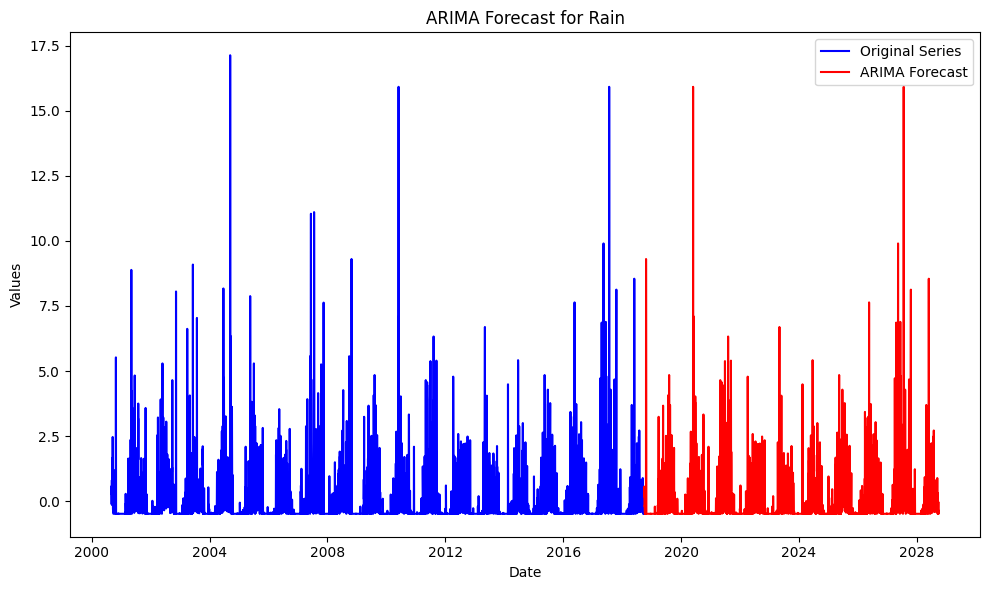

In [33]:
model_rain = ARIMA(df['rain_diff'], order=(p_rain, 0, q_rain))
model_fit_rain = model_rain.fit()
forecast_rain = model_fit_rain.forecast(steps=period)
pred_rain = model_fit_rain.predict(start=0, end=len(df['rain_diff'])-1) + df['Rain'].values

forecast_df['Rain']=plot_forecast(
    original_series=df['Rain'],            
    forecast_values=forecast_rain,         
    period=period,                         
    title='ARIMA Forecast for Rain'        
)


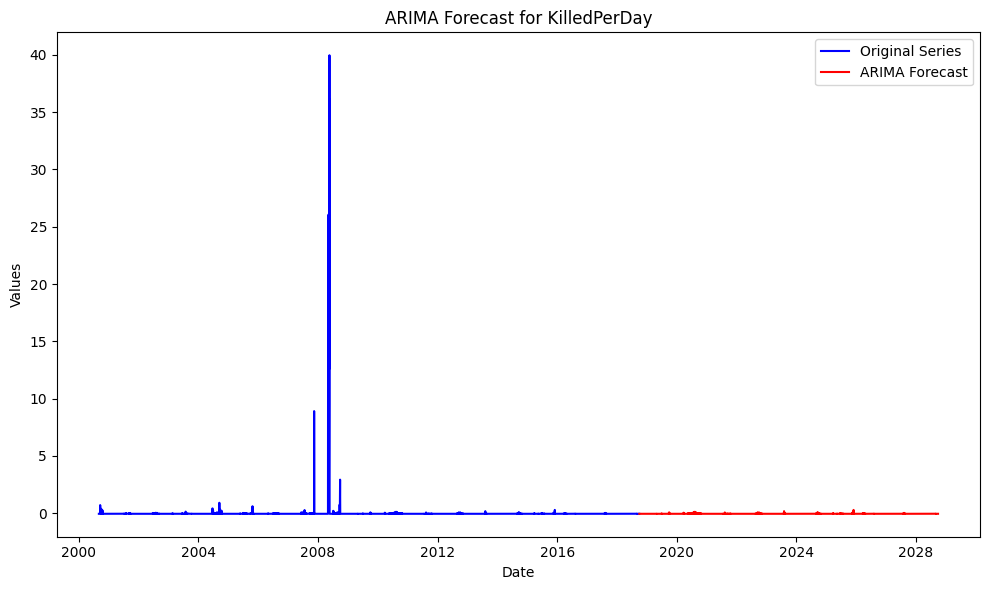

In [34]:
model_dead = ARIMA(df['dead_diff'], order=(p_dead, 0, q_dead))
model_fit_dead = model_dead.fit()
forecast_dead = model_fit_dead.forecast(steps=period)

forecast_df['Dead'] = plot_forecast(
    original_series=df['KilledPerDay'],            
    forecast_values=forecast_dead,         
    period=period,                         
    title='ARIMA Forecast for KilledPerDay'        
)

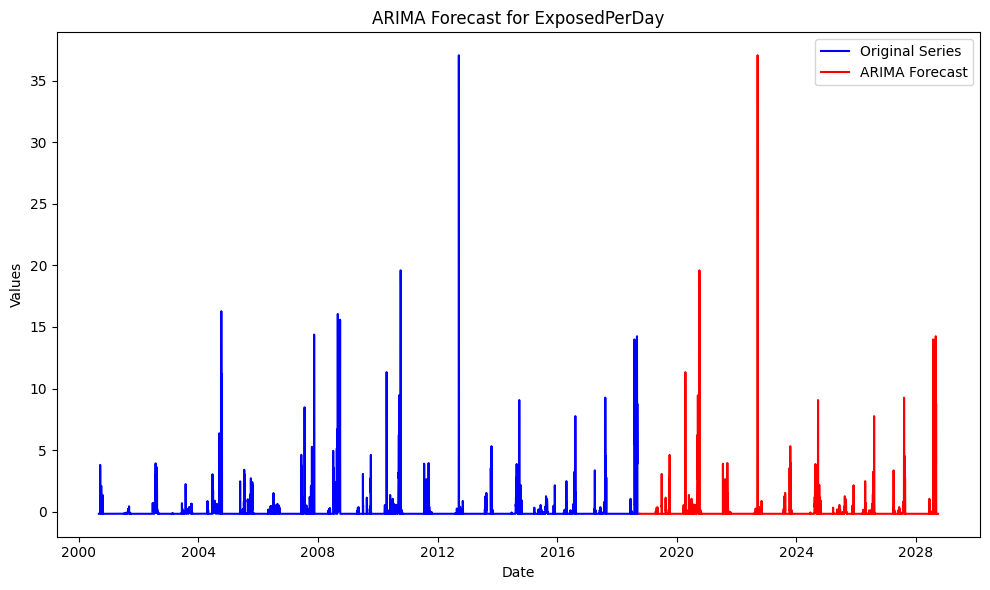

In [35]:
model_exp = ARIMA(df['exp_diff'], order=(p_exp, 0, q_exp))
model_fit_exp = model_exp.fit()
forecast_exp = model_fit_exp.forecast(steps=period)
forecast_df['Exposed'] = plot_forecast(
    original_series=df['ExposedPerDay'],            
    forecast_values=forecast_exp,         
    period=period,                         
    title='ARIMA Forecast for ExposedPerDay'        
)

In [36]:
forecast_df.head()

,Rain,Dead,Exposed
2018-09-01,0.351265,-0.047742,-0.171699
2018-09-02,0.172898,-0.047742,-0.171699
2018-09-03,0.556388,-0.047742,-0.171699
2018-09-04,-0.192755,-0.047742,-0.171699
2018-09-05,-0.183836,-0.047742,-0.171699


array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

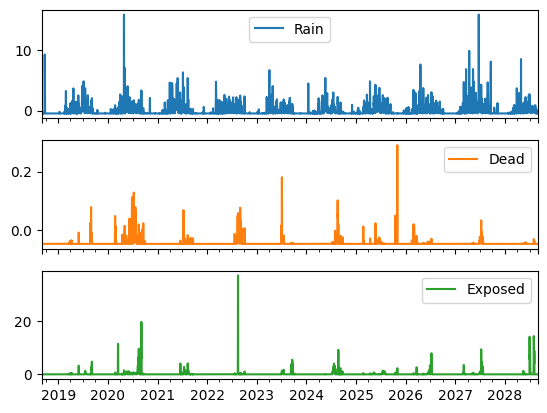

In [37]:
forecast_df.plot(subplots=True)

### Forecasting the possibility of flood

In [38]:
df.head()

,Flood,Rain,KilledPerDay,ExposedPerDay,rain_diff,dead_diff,exp_diff
2000-09-02,0.0,0.289066,-0.047737,-0.171694,-0.722387,0.0,0.0
2000-09-03,0.0,0.574454,-0.047737,-0.171694,0.285388,0.0,0.0
2000-09-04,0.0,0.217719,-0.047737,-0.171694,-0.356734,0.0,0.0
2000-09-05,0.0,-0.121178,-0.047737,-0.171694,-0.338898,0.0,0.0
2000-09-06,0.0,0.378250,-0.047737,-0.171694,0.499428,0.0,0.0
